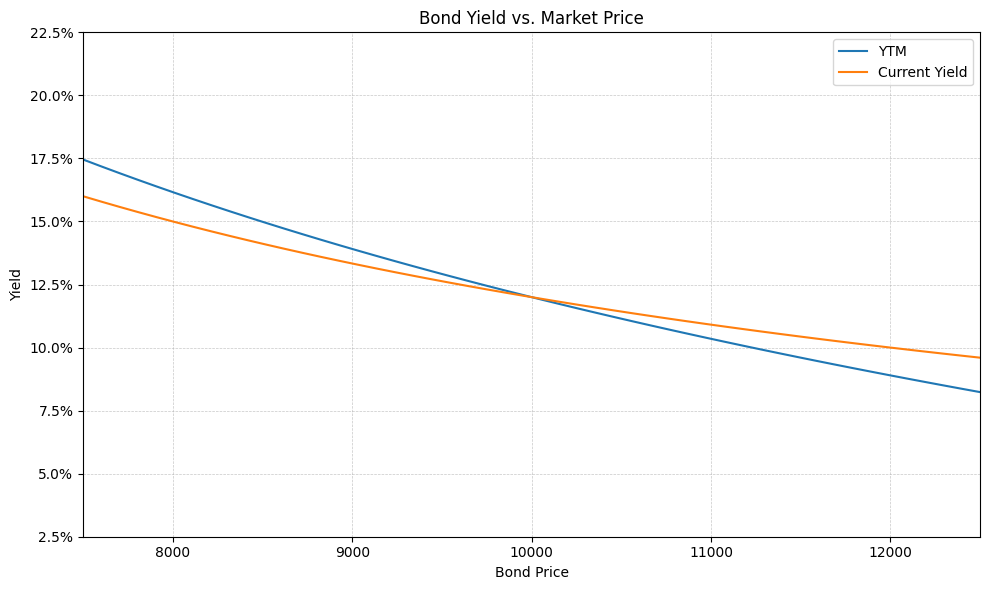

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
# numpy_financial is needed for the YTM calculation (rate function)
# Install it if you haven't: pip install numpy-financial
import numpy_financial as npf
import warnings # To suppress warnings from YTM calculation if needed

# --- Assumptions for the Bond ---
par_value = 10000  # Face value of the bond
coupon_rate = 0.12 # 12% coupon rate
annual_coupon = par_value * coupon_rate # Annual cash payment
years_to_maturity = 10 # Time until the bond matures

# --- Define the Range for Bond Prices ---
bond_prices = np.linspace(7500, 12500, 50) # Generate 50 points in the range

# --- Calculate Current Yield ---
# Current Yield = Annual Coupon Payment / Market Price
current_yields = annual_coupon / bond_prices

# --- Calculate Yield to Maturity (YTM) ---
# YTM requires an iterative calculation. We use numpy_financial.rate
# The rate function finds the yield per period.
# Arguments for npf.rate(nper, pmt, pv, fv):
# nper: Number of periods (years_to_maturity)
# pmt: Payment per period (annual_coupon)
# pv: Present value (the negative of the bond price)
# fv: Future value (par_value received at maturity)

ytm_values = []
with warnings.catch_warnings():
    # Ignore warnings that might occur if the calculation struggles to converge
    # for extreme price values, though it's usually robust.
    warnings.simplefilter("ignore")
    for price in bond_prices:
        try:
            # Calculate YTM. Note pv is negative (cash outflow to buy bond)
            ytm = npf.rate(nper=years_to_maturity, pmt=annual_coupon, pv=-price, fv=par_value)
            ytm_values.append(ytm)
        except ValueError:
            # Handle cases where rate calculation might fail (e.g., very extreme prices)
            ytm_values.append(np.nan) # Append Not-a-Number if calculation fails

ytm_values = np.array(ytm_values)

# --- Create the Plot ---
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize as needed

# Plot YTM vs. Bond Price (Blue line, similar to the graph)
ax.plot(bond_prices, ytm_values, label='YTM', color='tab:blue')

# Plot Current Yield vs. Bond Price (Orange line, similar to the graph)
ax.plot(bond_prices, current_yields, label='Current Yield', color='tab:orange')

# --- Customize the Plot ---
ax.set_title('Bond Yield vs. Market Price')
ax.set_xlabel('Bond Price')
ax.set_ylabel('Yield')

# Set axis limits to roughly match the original graph
ax.set_xlim(7500, 12500)
ax.set_ylim(0.025, 0.225) # 2.5% to 22.5%

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))

# Add grid lines (optional, styled to be faint like the original)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add the legend
ax.legend()

# --- Display the Plot ---
plt.tight_layout()
plt.show()

# --- Optional: Save the Plot ---
# fig.savefig('replicated_bond_yield_graph.png', dpi=300)
# print("Plot saved as replicated_bond_yield_graph.png")